In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [59]:
import os
print(os.listdir("/content/drive/My Drive/BelajarML/dataset/linear_Reg"))

['student-mat.csv', 'student-por.csv', 'student-mat_clean.csv']


Read Data

In [60]:
df = pd.read_csv('/content/drive/My Drive/BelajarML/dataset/linear_Reg/student-mat.csv', sep='[:,]', engine='python')

df.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"""GP"";""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teach..."
1,"""GP"";""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other..."
2,"""GP"";""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other..."
3,"""GP"";""F"";15;""U"";""GT3"";""T"";4;2;""health"";""servic..."
4,"""GP"";""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";..."


####*Data cleaning dari*

school;sex;age;address...
"GP";"F";18;"U"...

#####jadi

school,sex,age,address...

GP,F,18,U...

In [61]:
df = pd.read_csv('/content/drive/My Drive/BelajarML/dataset/linear_Reg/student-mat.csv', sep=';')

df.to_csv('/content/drive/My Drive/BelajarML/dataset/linear_Reg/student-mat_clean.csv', index=False)

In [62]:
df = pd.read_csv("/content/drive/My Drive/BelajarML/dataset/linear_Reg/student-mat_clean.csv")

df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [63]:
X = df.drop(columns='G3')
y = df['G3']

y_log = np.log1p(y)

In [64]:
categorical_features = ['school',
                        'address',
                        'famsize',
                        'Pstatus',
                        'Mjob',
                        'Fjob',
                        'reason',
                        'sex',
                        'schoolsup',
                        'famsup',
                        'paid',
                        'activities',
                        'nursery',
                        'higher',
                        'internet',
                        'romantic',
                        'guardian'
                        ]

numerical_features = [
                      'age',
                      'Medu',
                      'Fedu',
                      'traveltime',
                      'studytime',
                      'failures',
                      'famrel',
                      'freetime',
                      'goout',
                      'Dalc',
                      'Walc',
                      'health',
                      'absences'
                      ]

preprocessor = ColumnTransformer(
    transformers=[
      ('cat', OneHotEncoder(drop='first'), categorical_features),
      ('num', 'passthrough', numerical_features)
    ]
)

X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

In [65]:
linear_log = Pipeline([
  ('preprocessor', preprocessor),
  ('regressor', LinearRegression())
])

linear_log.fit(X_train, y_train_log)

y_pred_linear = linear_log.predict(X_test)

mae_lin = mean_absolute_error(y_test_log, y_pred_linear)
rmse_lin = np.sqrt(mean_squared_error(y_test_log, y_pred_linear))
r2_lin = r2_score(y_test_log, y_pred_linear)

print("Linear")
print(f"mae : {mae_lin:.3f}")
print(f"rmse : {rmse_lin:.3f}")
print(f"r2 : {r2_lin:.3f}")

feature_names = linear_log.named_steps['preprocessor'].get_feature_names_out()
coefficients = linear_log.named_steps['regressor'].coef_

coef_df = pd.DataFrame({
    'feature' : feature_names,
    'koef' : coefficients
}).sort_values(by='koef', ascending=False)

coef_df

Linear
mae : 0.508
rmse : 0.705
r2 : -0.080


,feature,koef
21,cat__higher_yes,0.320283
15,cat__sex_M,0.237313
0,cat__school_MS,0.203773
18,cat__paid_yes,0.194997
25,cat__guardian_other,0.158810
8,cat__Fjob_health,0.142002
2,cat__famsize_LE3,0.105612
16,cat__schoolsup_yes,0.104854
13,cat__reason_other,0.102464
30,num__studytime,0.100297


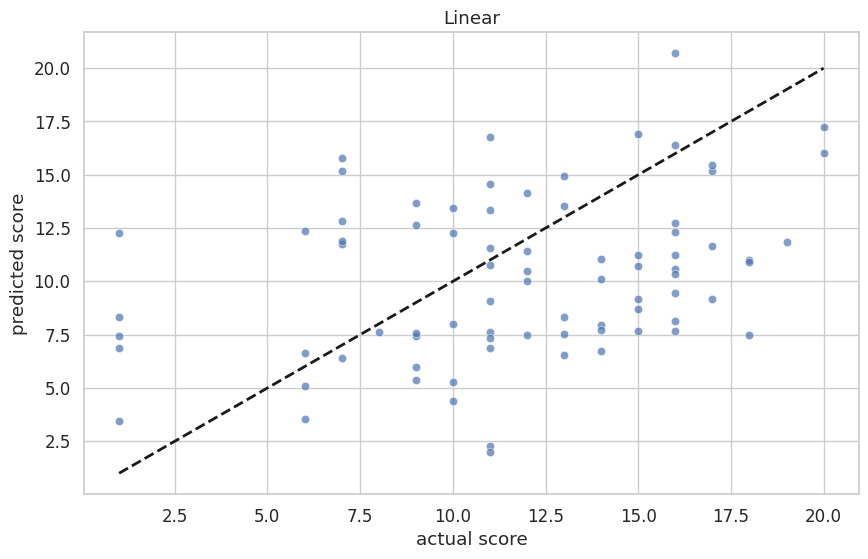

In [66]:
sns.set(style="whitegrid", font_scale=1.1)

y_test_exp = np.exp(y_test_log)
y_pred_exp = np.exp(y_pred_linear)

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test_exp, y=y_pred_exp, alpha=0.7)
plt.plot(
   [y_test_exp.min(), y_test_exp.max()],
   [y_test_exp.min(), y_test_exp.max()],
   'k--', lw=2)
plt.xlabel("actual score")
plt.ylabel("predicted score")
plt.title("Linear")
plt.show()

Linear With G1 dan G2

In [71]:
categorical_features_G1G2 = ['school',
                        'address',
                        'famsize',
                        'Pstatus',
                        'Mjob',
                        'Fjob',
                        'reason',
                        'sex',
                        'schoolsup',
                        'famsup',
                        'paid',
                        'activities',
                        'nursery',
                        'higher',
                        'internet',
                        'romantic',
                        'guardian'
                        ]

numerical_features_G1G2 = [
                      'age',
                      'Medu',
                      'Fedu',
                      'traveltime',
                      'studytime',
                      'failures',
                      'famrel',
                      'freetime',
                      'goout',
                      'Dalc',
                      'Walc',
                      'health',
                      'absences',
                      'G1',
                      'G2'
                      ]

preprocessor = ColumnTransformer(
    transformers=[
      ('cat', OneHotEncoder(drop='first'), categorical_features_G1G2),
      ('num', 'passthrough', numerical_features_G1G2)
    ]
)

X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

In [72]:
linear_log_G1G2 = Pipeline([
  ('preprocessor', preprocessor),
  ('regressor', LinearRegression())
])

linear_log_G1G2.fit(X_train, y_train_log)

y_pred_linear_G1G2 = linear_log_G1G2.predict(X_test)

mae_lin = mean_absolute_error(y_test_log, y_pred_linear_G1G2)
rmse_lin = np.sqrt(mean_squared_error(y_test_log, y_pred_linear_G1G2))
r2_lin = r2_score(y_test_log, y_pred_linear_G1G2)

print("Linear with G1 G2")
print(f"mae : {mae_lin:.3f}")
print(f"rmse : {rmse_lin:.3f}")
print(f"r2 : {r2_lin:.3f}")

feature_names = linear_log_G1G2.named_steps['preprocessor'].get_feature_names_out()
coefficients = linear_log_G1G2.named_steps['regressor'].coef_

coef_df = pd.DataFrame({
    'feature' : feature_names,
    'koef' : coefficients
}).sort_values(by='koef', ascending=False)

coef_df

Linear with G1 G2
mae : 0.402
rmse : 0.586
r2 : 0.254


,feature,koef
16,cat__schoolsup_yes,0.256599
40,num__G2,0.187657
21,cat__higher_yes,0.185887
8,cat__Fjob_health,0.150056
0,cat__school_MS,0.100725
15,cat__sex_M,0.090805
18,cat__paid_yes,0.060546
32,num__famrel,0.049161
7,cat__Mjob_teacher,0.041039
34,num__goout,0.040331


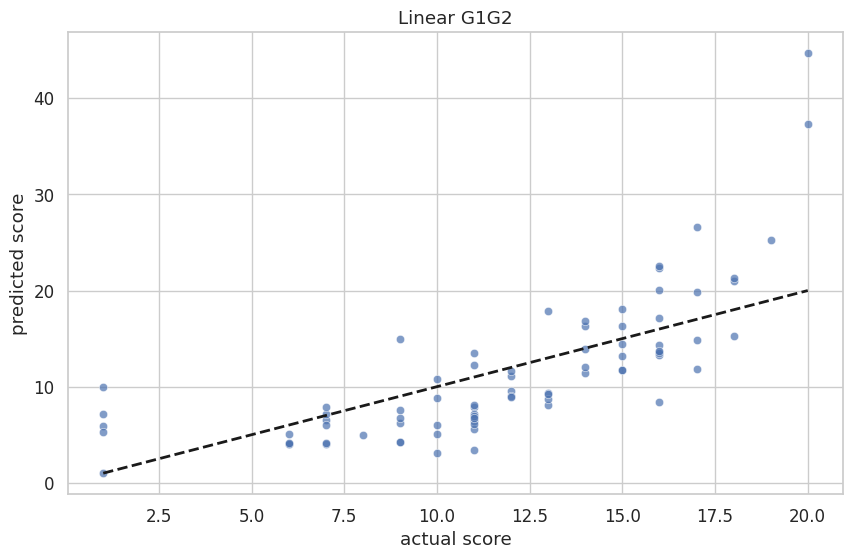

In [73]:
sns.set(style="whitegrid", font_scale=1.1)

y_test_exp = np.exp(y_test_log)
y_pred_exp = np.exp(y_pred_linear_G1G2)

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test_exp, y=y_pred_exp, alpha=0.7)
plt.plot(
   [y_test_exp.min(), y_test_exp.max()],
   [y_test_exp.min(), y_test_exp.max()],
   'k--', lw=2)
plt.xlabel("actual score")
plt.ylabel("predicted score")
plt.title("Linear G1G2")
plt.show()